In [1]:
from scattnlay import scattnlay, fieldnlay
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
scattnlay

<function scattnlay.main.scattnlay(x, m, theta=array([], dtype=float64), nmax=-1, pl=-1, mp=False)>

In [3]:
help(scattnlay)

Help on function scattnlay in module scattnlay.main:

scattnlay(x, m, theta=array([], dtype=float64), nmax=-1, pl=-1, mp=False)
    scattnlay(x, m[, theta, nmax, pl, mp])
    
    Calculate the actual scattering parameters and amplitudes.
    
        x: Size parameters (1D or 2D ndarray)
        m: Relative refractive indices (1D or 2D ndarray)
        theta: Scattering angles where the scattering amplitudes will be
               calculated (optional, 1D ndarray)
        nmax: Maximum number of multipolar expansion terms to be used for the
              calculations. Only use it if you know what you are doing.
        pl: Index of PEC layer. If there is none just send -1.
        mp: Use multiple (True) or double (False) precision.
    
    Returns: (terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2)
    with
        terms: Number of multipolar expansion terms used for the calculations
        Qext: Efficiency factor for extinction
        Qsca: Efficiency factor for scattering
  

In [163]:
def x_size_param(d, wavelength):
    return d*np.pi/wavelength

def droplet_scatteirng_amplitudes(x, theta): 
    m = np.array([1.33 + 0.0j], dtype = np.complex128)
    terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(x, m, theta)
    return S1, S2

def phase_function(S1, S2): # unpolarised light
    return 0.5*(abs(S1)**2+abs(S2)**2)

def solid_angle_normalisation(y, theta): # integrate y over solid angle theta, phi 0-2pi
    N = np.trapz(y*np.sin(theta), theta)*2*np.pi
    return y/N

def normalised_irr(x, theta):
    S1, S2 = droplet_scatteirng_amplitudes(x, theta)
    irr = phase_function(S1, S2)
#     irr = solid_angle_normalisation(irr, theta)
    return irr

def solid_angle_scattered_irradiance(x, theta, theta1, theta2): # integrate norm phase function over solid angle from theta1 to theta2
    irr = normalised_irr(x, theta) # get irradiances
    (ind1, theta1) = min(enumerate(theta), key=lambda x: abs(theta1 - x[1])) # find closest xthetas to range
    (ind2, theta2) = min(enumerate(theta), key=lambda x: abs(theta2 - x[1]))
    
    irr_range = irr[ind1:ind2+1]
    theta_range = theta[ind1:ind2+1]
    return np.trapz(irr_range*np.sin(theta_range), theta_range )*2*np.pi # int, actual range

In [169]:
# array of size parameters
min_drop, max_drop, step = 1e-6, 50e-6 , 0.1e-6 # 0 - 10um

droplet_sizes = np.arange(min_drop, max_drop, step) 
wavelength = 632.8e-9
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))

In [170]:
# theta (phase function resolution)
deg_step = 0.5
theta = np.arange(0, np.pi, np.radians(1))

reponse curve for theta range

In [171]:
theta1_deg = 4.6
theta2_deg = 12.8
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)),droplet_x_iter)
scat_irr = list(scat_irr_iter)

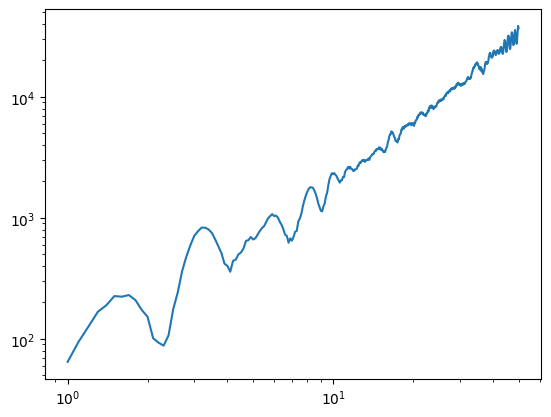

In [172]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

validation 1 – scattnlay produces a similar plot to bhmie for x = 3


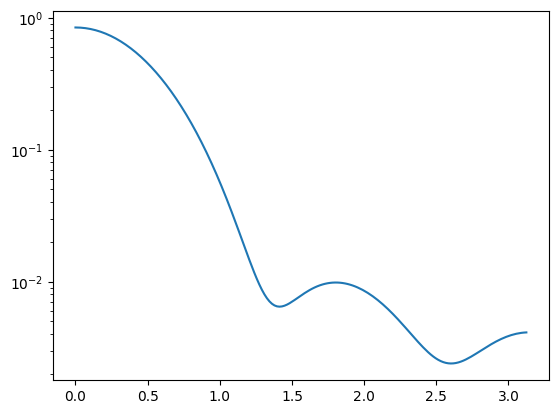

In [35]:
irr = normalised_irr(np.array([3]), theta)
plt.yscale("log")
plt.plot(theta, irr)

In [89]:
def droplet_scatteirng_effciency(x, theta): 
    m = np.array([1.33 + 0.0j], dtype = np.complex128)
    terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(x, m, theta)
    return Qsca

validation 2 – scattering efficiency, scattering cross-section


In [126]:
scat_eff_iter = map(lambda x: droplet_scatteirng_effciency(x, theta), droplet_x_iter)
scat_eff = list(scat_eff_iter)

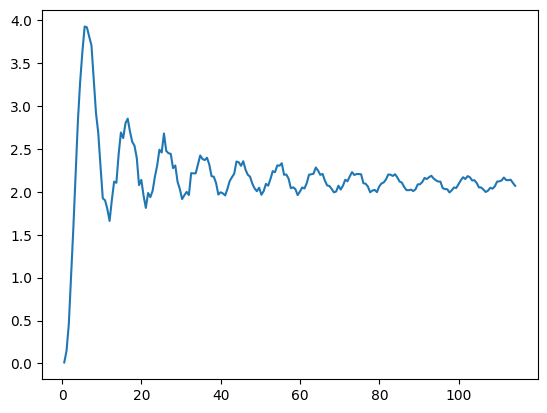

In [127]:
plt.plot(droplet_x,scat_eff)

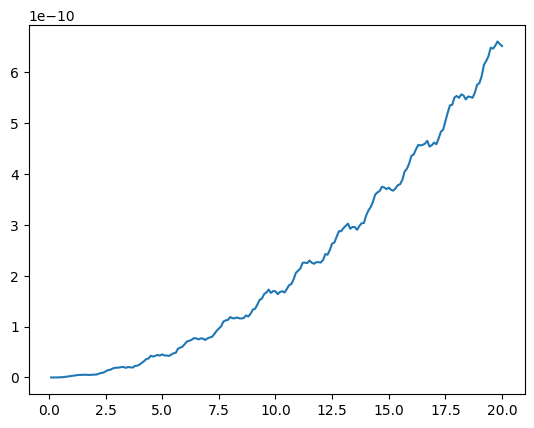

In [138]:
scat_cross = np.array(scat_eff)*np.pi*(0.5*np.array(droplet_sizes))**2 # cm^2
# plt.yscale("log")
plt.plot(droplet_sizes*10**6,scat_cross)

In [135]:
# theta (phase function resolution)

deg_step = 1
# theta = np.arange(np.radians(144), np.radians(156), np.radians(1))
theta = np.arange(0, np.pi, np.radians(1))

droplet_scatteirng_effciency(np.array([3]), theta)

1.753396984097412